 # Multiclass logistic regression
 Goal:
 1. Define functions for training a multiclass logistic regression
 1. Train the classifier using gradient descent
 1. Visualize a multi-class logisitc regression for 2D data
 1. Test different feature transforms

 **Reference:**
 Section "4.3.4 Multiclass logistic regression"
 of

 C. M. Bishop *Pattern Recognition and Machine Learning*,
Information Science and Statistics, Springer, 2006

Freely available:
https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_gaussian_quantiles
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create some toy dataset:

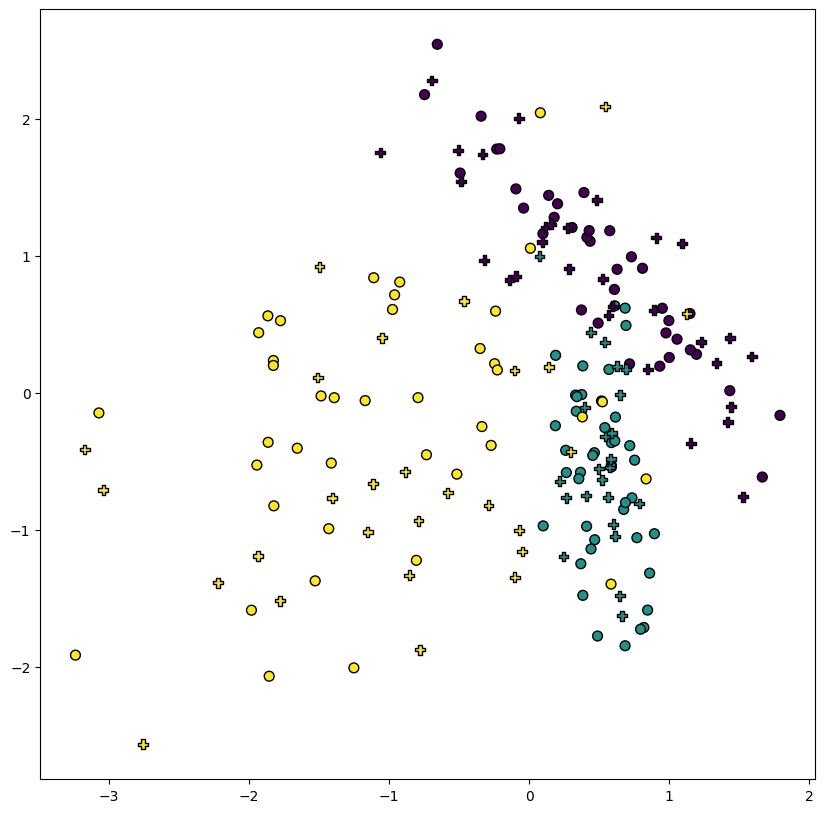

In [58]:
n_class = 3
# Three examples of synthetic 2D datasets:
X, t = make_blobs(n_features=2, centers = n_class,n_samples=100)
X, t = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=24, n_classes=n_class, n_clusters_per_class=1,n_samples=200)
#X, t = make_gaussian_quantiles(n_features=2, n_classes=n_class, n_samples=500)

X = StandardScaler().fit_transform(X)

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=.4, random_state=12)
# Number of points in each set:
N_train = X_train.shape[0]
N_test = X_test.shape[0]

figure = plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k');
plt.show()



## Apply feature transform:


In [59]:

# Define some feature transforms:

def identity(x):
  return(np.hstack((x, np.ones((x.shape[0],1)))))

def feat_transform_2D_prod(x):
  return np.hstack( (x, x**2, (x[:,0]*x[:,1]).reshape((x.shape[0],1)), np.ones((x.shape[0],1))))

feature_transform = identity
feature_transform = feat_transform_2D_prod



Phi_train = feature_transform(X_train)
n_feat = Phi_train.shape[1]
print('n_feat = ', n_feat)
Phi_test = feature_transform(X_test)


n_feat =  6


<font color='blue'> **Question** Que fait le code ```np.ones((x.shape[0],1))``` ? A quoi cela correspond ? </font>

## Functions for Multiclass logistic regression:


In [60]:
# - W is the matrix of size n_feat x n_class

def soft_max(W, Phi):
  # evaluate the softmax vector for a list of feature points phi (given in line)
  if Phi.ndim==1: # row convention
    Phi = Phi.reshape((1,Phi.size))
  a = Phi @ W
  y = np.exp(a)
  s = np.sum(y,axis=1)
  y = y/s.reshape((s.size,1))
  return(y)

def predicted_class(W,Phi):
  if Phi.ndim==1: # row convention
    Phi = Phi.reshape((1,Phi.size))
  a = Phi @ W
  pred = np.argmax(a,axis=1)
  # # equivalent to:
  # y = soft_max(W, Phi)
  # pred = np.argmax(y,axis=1)
  return(pred)

def mloglikelihood(W, Phi, t):
  if Phi.ndim==1: # row convention
    Phi = Phi.reshape((1,Phi.size))
  y = soft_max(W, Phi)
  y = y[np.arange(Phi.shape[0]),t]
  L = - np.sum(np.log(y))
  return(L)

def gradmloglikelihood(W, Phi, t):
  if Phi.ndim==1: # row convention
    Phi = Phi.reshape((1,Phi.size))
  y = soft_max(W, Phi)
  y[np.arange(Phi.shape[0]),t] = y[np.arange(Phi.shape[0]),t] - 1
  g = Phi.transpose() @ y
  return(g)



## Training with gradient descent on full dataset

n =  0  F(W) =  138.59056449739836
n =  0  F(W) =  85.99219170494464
n =  100  F(W) =  35.63106131981631
n =  200  F(W) =  33.70044229746328
n =  300  F(W) =  32.68774771565722
n =  400  F(W) =  31.964430820676156
n =  500  F(W) =  31.399336516599718
n =  600  F(W) =  30.939855015650853
n =  700  F(W) =  30.557035767106854
n =  800  F(W) =  30.23241162275407
n =  900  F(W) =  29.953268221458977


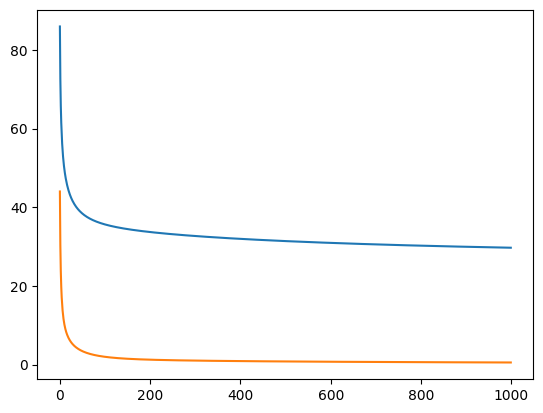

In [61]:
# random initialization: #########################################################
W = np.random.rand(n_feat,n_class)


Loss = [] ################################
grad_norm = [] ################################

# run Nit iterations of gradient descent (can be done several times if convergence is not observed):
lr = 1/N_train
Nit = 10**3
print('n = ', 0, ' F(W) = ', mloglikelihood(W, Phi_train, t_train))
for n in range(Nit):
  W -= lr*gradmloglikelihood(W, Phi_train, t_train)
  #lr = learning rate, qui se traduit en 'taux d'apprentissage'

  Loss.append(mloglikelihood(W, Phi_train, t_train)) ################################
  grad_norm.append(np.linalg.norm(gradmloglikelihood(W, Phi_train, t_train))) ################################

  #To compute a norm: np.linalg.norm().


  if n%(100)==0:
    print('n = ', n, ' F(W) = ', mloglikelihood(W, Phi_train, t_train))


plt.plot(Loss)################################
plt.plot(grad_norm)################################



  <font color='blue'>**Question** : Afficher la valeur du 'loss' et la norme du gradient au cours des itérations. </font>

 <font color='blue'>**Question** :Qu'est-ce que 'lr' ? Essayer de changer sa valeur. Commenter. </font>

## Classifier prediction:

  <font color='blue'> **Question** : Observer les probabilités prédites pour le premier point de l'ensemble de test.</font>

In [62]:
print(W.shape)
print(Phi_test.shape)

pred = predicted_class(W,Phi_test)


print('pred: ', pred[:30])
print('true: ', t_test[:30])


print(soft_max(W, Phi_test)[0]) ##################################################

(6, 3)
(80, 6)
pred:  [0 0 2 1 0 0 0 0 1 0 2 1 2 2 2 1 0 2 2 2 0 2 1 0 0 2 0 1 0 1]
true:  [0 0 2 1 0 0 0 0 1 0 2 1 2 2 2 1 0 2 2 2 0 2 1 0 0 2 0 1 0 2]
[0.82798569 0.0265188  0.14549551]


## Visualize classifiction regions:


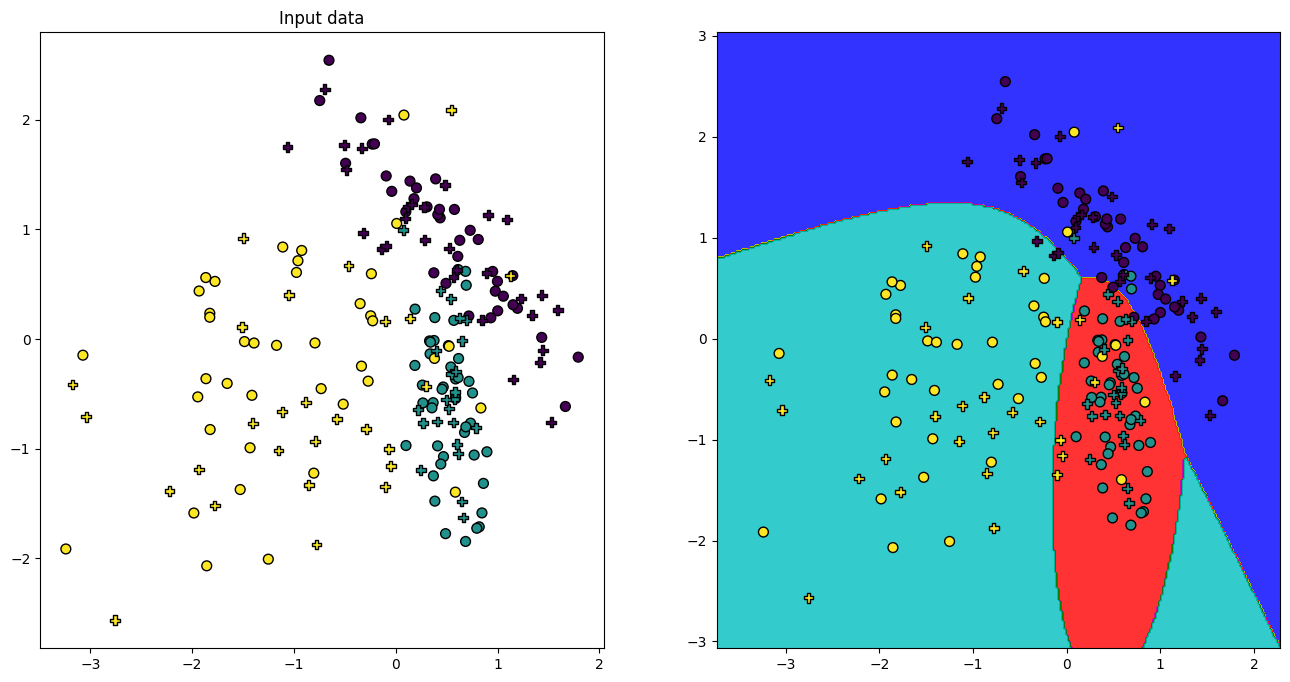

In [63]:
#visualize results:

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
X_grid = np.hstack((xx.ravel(), yy.ravel()))

N_grid = xx.ravel().shape[0]
X_grid = np.c_[xx.ravel(), yy.ravel()]
Phi_grid = feature_transform(X_grid)

Z = predicted_class(W,Phi_grid)
Z = Z.reshape(xx.shape)

figure = plt.figure(figsize=(16, 8))
ax = plt.subplot(1,2,1)
ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')
ax = plt.subplot(1,2,2)
cmap = ListedColormap(['b','y','r','m','g','c'])
plt.contourf(xx,yy,Z,  cmap = cmap, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')


## Classifier performance:
  <font color='blue'>
**Exercise**
Evaluer les performances du classifieur en utilisant les fonctions ci-dessous. (les documentations sont disponibles en ligne):</font>

```
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
```

In [64]:
from sklearn.metrics import classification_report
y_true = t_test
y_pred = predicted_class(W,Phi_test)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      0.90      0.90        30
     class 1       0.81      0.96      0.88        23
     class 2       0.87      0.74      0.80        27

    accuracy                           0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



## Importance of feature transform:

**Exercice**

Avec le jeu de données ```gaussian_quantiles``` :

1. Testez le classificateur avec la transformation de caractéristiques fournie ```identity```. Expliquez les résultats.
2. Testez le classificateur avec la transformation de caractéristiques fournie ```feat_transform_2D_prod```. Expliquez les résultats.
3. Définissez une feature transform correspondant à une couche cachée linéaire avec $d=25$ neurones cachés, appliquant une transformation linéaire suivie d'une activation ReLU, où chaque poids et biais est tiré aléatoirement selon une distribution gaussienne standard (entrées iid, fixées et utilisées pour tous les points de données). Que peut-on attendre des performances d'un réseau de neurones avec ce jeu de données ?


  <font color='blue'> **Question**: Proposer une tranformation en "features" pour le troisième "dataset" (```gaussian_quantiles```).</font>

# S'il reste du temps :

Commener à faire connaissance avec les tensors : https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html